https://towardsdatascience.com/satellite-imagery-analysis-using-python-9f389569862c

gdal_translate T33SVV_20210208T094049_B12.jp2 B12.tif

In [1]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

from rasterio import plot
import rasterio as rio
import geopandas as gpd #for charting and mapping
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# import bands as separate 1 band raster
imagePath = './data\S2B_MSIL1C_20210208T094049_N0209_R036_T33SVV_20210208T115143.SAFE\GRANULE\L1C_T33SVV_A020511_20210208T095028\IMG_DATA/'

In [3]:
# Load polygon vector of AI (e.g.Gozo) to clip satellite image
boundsdata = r'./data/Zabbar.geojson'
region = gpd.read_file(boundsdata)
print(region)
nReserve_proj = region.to_crs({'init': 'epsg:32633'})

   id                                           geometry
0   1  MULTIPOLYGON (((14.52731 35.88088, 14.53660 35...


C:\Users\MCAST\anaconda3\envs\remsen\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



https://osgis.org/2020/06/sentinel-2-bands-and-combinations/

https://towardsdatascience.com/satellite-imagery-analysis-using-python-9f389569862c
https://towardsdatascience.com/satellite-imagery-access-and-analysis-in-python-jupyter-notebooks-387971ece84b

In [4]:
b2 = rio.open(imagePath+'B02.jp2')
b3 = rio.open(imagePath+'B03.jp2')
b4 = rio.open(imagePath+'B04.jp2')

blue = b2.read(1)
green = b3.read(1)
red = b4.read(1)

In [ ]:
print(np.nanmax(blue))
print(np.nanmin(green))
print(np.nanmax(red))

In [6]:
b4 = rio.open(imagePath+'B04.jp2')
b8a = rio.open(imagePath+'B8A.jp2')
b12 = rio.open(imagePath+'B12.jp2')

#export false color image
falseColor = rio.open('./Output/ShortWave.tiff', 'w', driver='Gtiff',
                          width=b4.width, height=b4.height,
                          count=3,
                          crs=b4.crs,
                          transform=b4.transform,
                          dtype='uint16'
                         )
falseColor.write(b12.read(1),1) #swir
falseColor.write(b8a.read(1),2) #vre
falseColor.write(b4.read(1),3) #red

falseColor.close()

"""
red = b4.read(1)
vre4 = b8a.read(1)
swir3 = b12.read(1)"""

'\nred = b4.read(1)\nvre4 = b8a.read(1)\nswir3 = b12.read(1)'

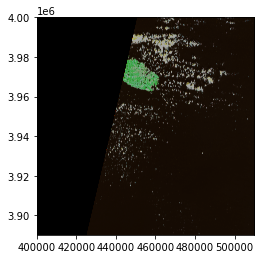

In [9]:
from skimage import exposure
# Plot an intensity rescaled the RGB image with Rasterio

img = rio.open(r"./Output/ShortWave.tiff", count=3)

# Rescale the image (divide by 10000 to convert to [0:1] reflectance
image = np.array([img.read(3), img.read(2), img.read(1)]).transpose(1,2,0)
p2, p98 = np.percentile(image, (2,98))
image = exposure.rescale_intensity(image, in_range=(p2, p98)) / 100000

plot.show(image.transpose(2,0,1), transform=img.transform)

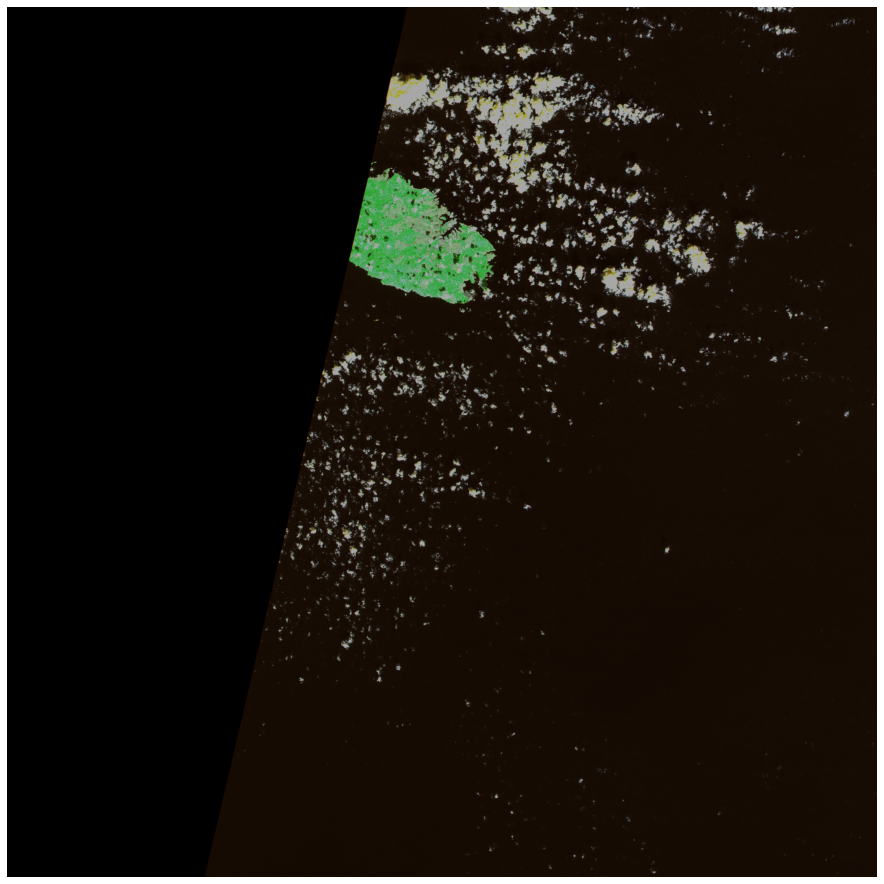

In [10]:
#Plot and save image with Matplotlib
fig = plt.figure(figsize=(20,16))
ax=fig.add_subplot(1,1,1)
plt.axis('off')
plt.imshow(image)

#Save scaled reflectance image
# Call 'savefig' to save this plot to an image file
plt.savefig("./Output/Sentinel_Scaled_Reflectance.tiff", bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()

C:\Users\MCAST\anaconda3\envs\remsen\lib\site-packages\rasterio\__init__.py:219: NotGeoreferencedWarning:

Dataset has no geotransform set. The identity matrix may be returned.



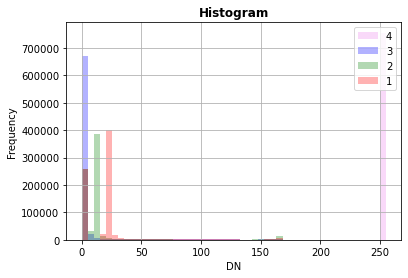

In [12]:
#generate histogram
shortWave = rio.open('./Output/Sentinel_Scaled_Reflectance.tiff')
plot.show_hist(shortWave, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

https://eijournal.com/print/articles/how-to-interpret-a-false-color-satellite-image



